<a href="https://colab.research.google.com/github/StrikerEureka34/Regression_Level2/blob/main/Logistic_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path="/content/drive/MyDrive/data_sets/framingham.csv"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
heart_data=pd.read_csv(path)
heart_data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


<Axes: xlabel='prevalentStroke', ylabel='count'>

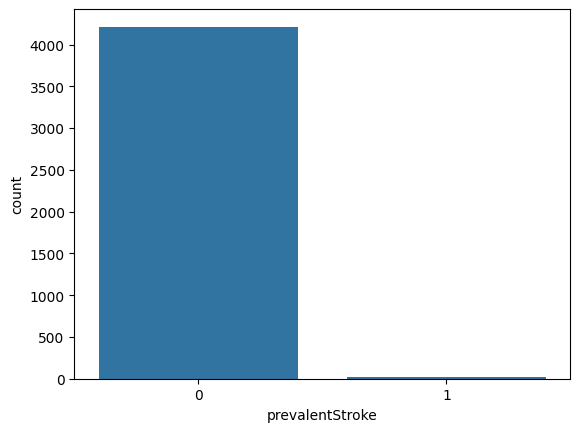

In [ ]:
sns.countplot(x="prevalentStroke",data=heart_data)

<Axes: xlabel='prevalentHyp', ylabel='count'>

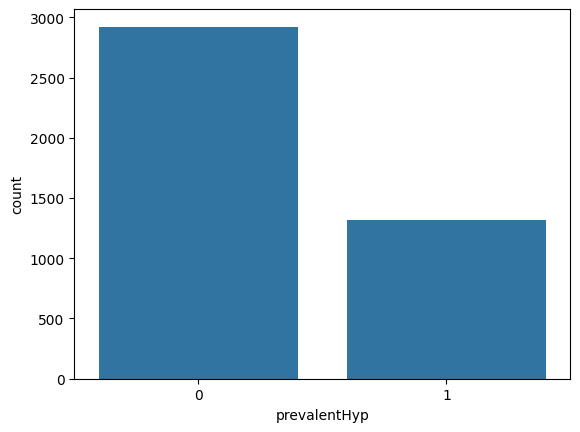

In [ ]:
sns.countplot(x="prevalentHyp",data=heart_data)

<Axes: ylabel='Frequency'>

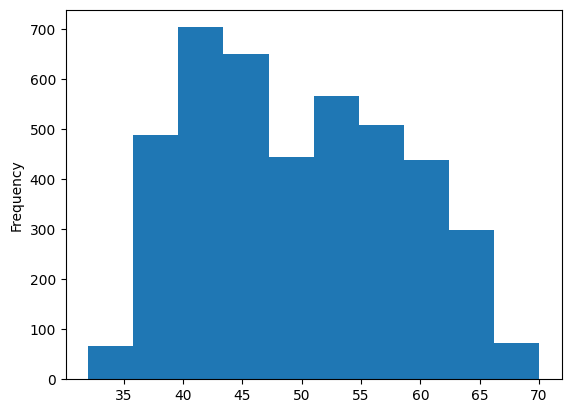

In [ ]:
heart_data['age'].plot.hist()

<Axes: ylabel='Frequency'>

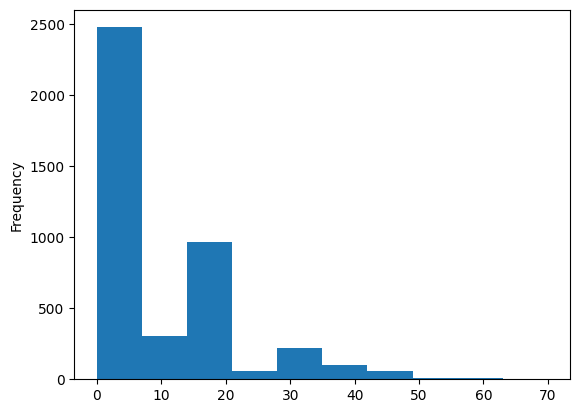

In [ ]:
heart_data['cigsPerDay'].plot.hist()

<Axes: ylabel='Frequency'>

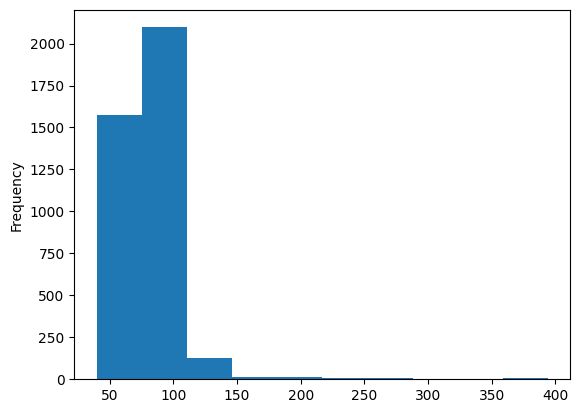

In [ ]:
heart_data['glucose'].plot.hist()

<Axes: xlabel='TenYearCHD', ylabel='count'>

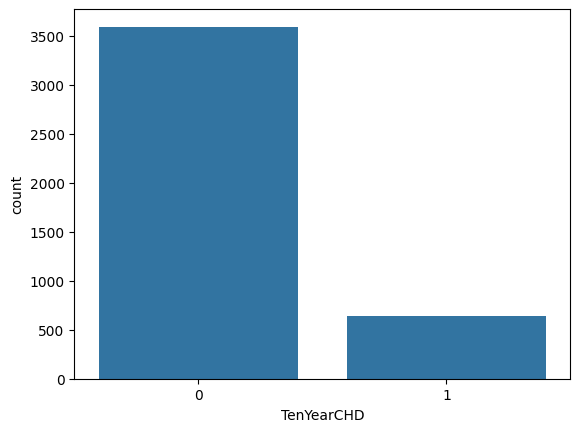

In [ ]:
sns.countplot(x="TenYearCHD",data=heart_data)

In [ ]:
#finding all the null values in the data
heart_data.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
heart_data.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


<Axes: >

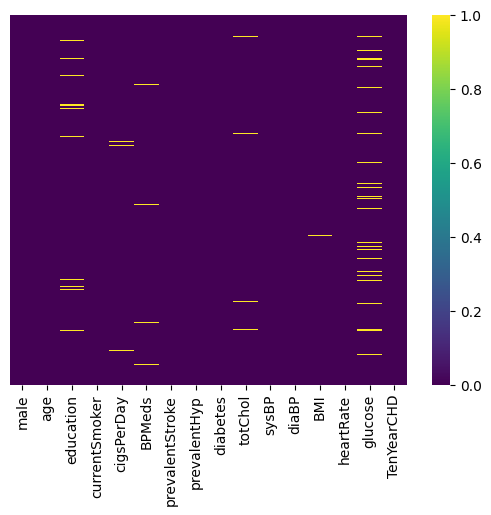

In [ ]:
#ploting the heatmap
sns.heatmap(heart_data.isnull(),yticklabels=False,cmap="viridis")

In [ ]:
#Dropping unnecessary parameters
heart_data.drop("education",axis=1,inplace=True)
heart_data.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [ ]:
#replacing null values with appropritate assumptions
m=np.mean(heart_data["glucose"])
heart_data["glucose"].replace(to_replace=np.nan,value=m,inplace=True)
heart_data["BMI"].replace(to_replace=np.nan,value=25,inplace=True)
heart_data["cigsPerDay"].replace(to_replace=np.nan,value=5,inplace=True)
heart_data["heartRate"].replace(to_replace=np.nan,value=90,inplace=True)
heart_data.drop("currentSmoker",axis=1,inplace=True)


<ipython-input-76-834019e5aded>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data["glucose"].replace(to_replace=np.nan,value=m,inplace=True)
<ipython-input-76-834019e5aded>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

<Axes: ylabel='Frequency'>

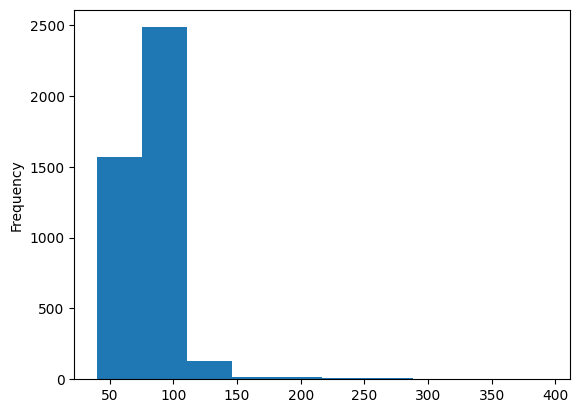

In [ ]:
heart_data["glucose"].plot.hist()

<Axes: >

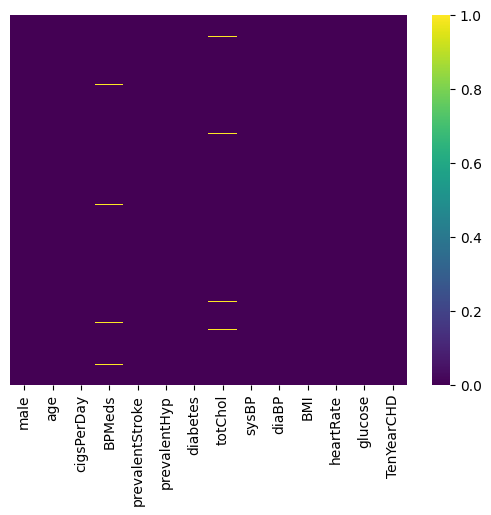

In [ ]:
sns.heatmap(heart_data.isnull(),yticklabels=False,cmap="viridis")

<ipython-input-79-a3056080d715>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data["totChol"].replace(to_replace=np.nan,value=247,inplace=True)


<Axes: >

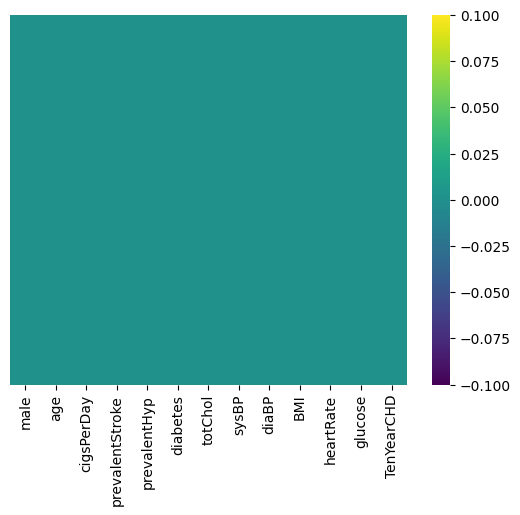

In [ ]:
heart_data["totChol"].replace(to_replace=np.nan,value=247,inplace=True)
heart_data.drop("BPMeds",axis=1,inplace=True)
sns.heatmap(heart_data.isnull(),yticklabels=False,cmap="viridis")

In [ ]:
heart_data.isnull().sum()

,0
male,0
age,0
cigsPerDay,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0
diaBP,0
BMI,0


<Axes: xlabel='TenYearCHD', ylabel='count'>

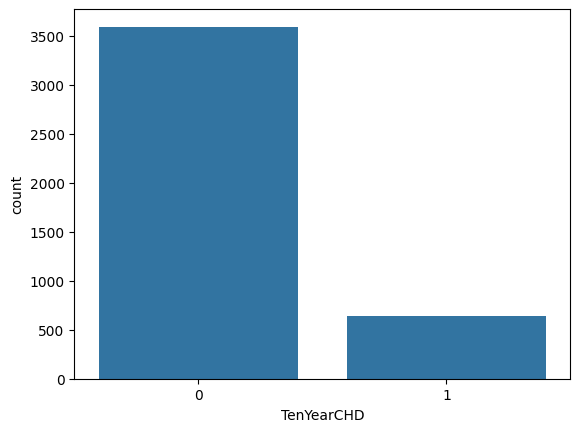

In [ ]:
sns.countplot(x="TenYearCHD",data=heart_data)

In [ ]:
X=heart_data.drop("TenYearCHD",axis=1)
y=heart_data["TenYearCHD"].values
y
#Data PreProcessing Completed

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Traing and Testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score




0.8525943396226415


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
iris=load_iris()
X=iris.data
y=iris.target
normalized_X=preprocessing.normalize(X)



In [ ]:
print('accuracy Score:'+str(accuracy_score(y_test,y_pred)))
print('recall Score:'+str(recall_score(y_test,y_pred)))
print('prediction Score:'+str(precision_score(y_test,y_pred)))
print('f1 Score:'+str(f1_score(y_test,y_pred)))
from sklearn.metrics import confusion_matrix
print('Confusion matrix'+str(confusion_matrix(y_test,y_pred)))

accuracy Score:0.8525943396226415
recall Score:0.046153846153846156
prediction Score:0.8571428571428571
f1 Score:0.08759124087591241
Confusion matrix[[717   1]
 [124   6]]


In [ ]:
from sklearn.model_selection import GridSearchCV
clf=LogisticRegression()
grid_values={'penalty':['l1','l2'],'C':[0.001,0.009,0.01,0.09,1,5,10,25]}
grid_clf_acc=GridSearchCV(clf,param_grid=grid_values,scoring='accuracy')
grid_clf_acc.fit(X_train,y_train)
y_pred=grid_clf_acc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
#Accuracy Score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.847877358490566